In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import os
import cv2
import torch
from torch.optim import SGD

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [35]:
# making our own custom dataset
def make_dataset(csv_file, root_dir, transform=None):
    annotations = pd.read_csv(csv_file)
    data = []
    for i in range(len(annotations)):
        img_path = os.path.join(root_dir, str(annotations.iloc[i, 0]))
        #print(img_path)
        label = int(annotations.iloc[i, 1])
        img = cv2.imread(img_path)
        #print(img)
        
        if transform:
            img = cv2.resize(img, (300, 300))
        data.append((img, label))
    return data

In [36]:
def make_dataloaders(dataset, batch_size):
    # i'm ignoring class imabalnce (if any) in randomly genrated train and test sets
    train_data, test_data = torch.utils.data.random_split(dataset, [2030, 510])
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
    return train_loader, test_loader

In [37]:
def plot_batch(dataloader, batch_size):
    for _, batch in enumerate(dataloader, 0):
        plt.figure(figsize=(100, 30))
        for i in range(batch_size):
            style.use('ggplot')
            plt.subplot(4, 8, i+1)
            plt.imshow(batch[0][i])
            plt.title(batch[1][i].item())
        plt.show()
        break

In [5]:
root_dir = 'C:\\Users\\Ayush\\Desktop\\Let_us_start_once_again\\Classification\\concetto_CDT'
csv_file = 'train.csv'
batch_size = 64
dataset = make_dataset(csv_file, root_dir, transform=True)
train_loader, test_loader = make_dataloaders(dataset,  batch_size=batch_size)

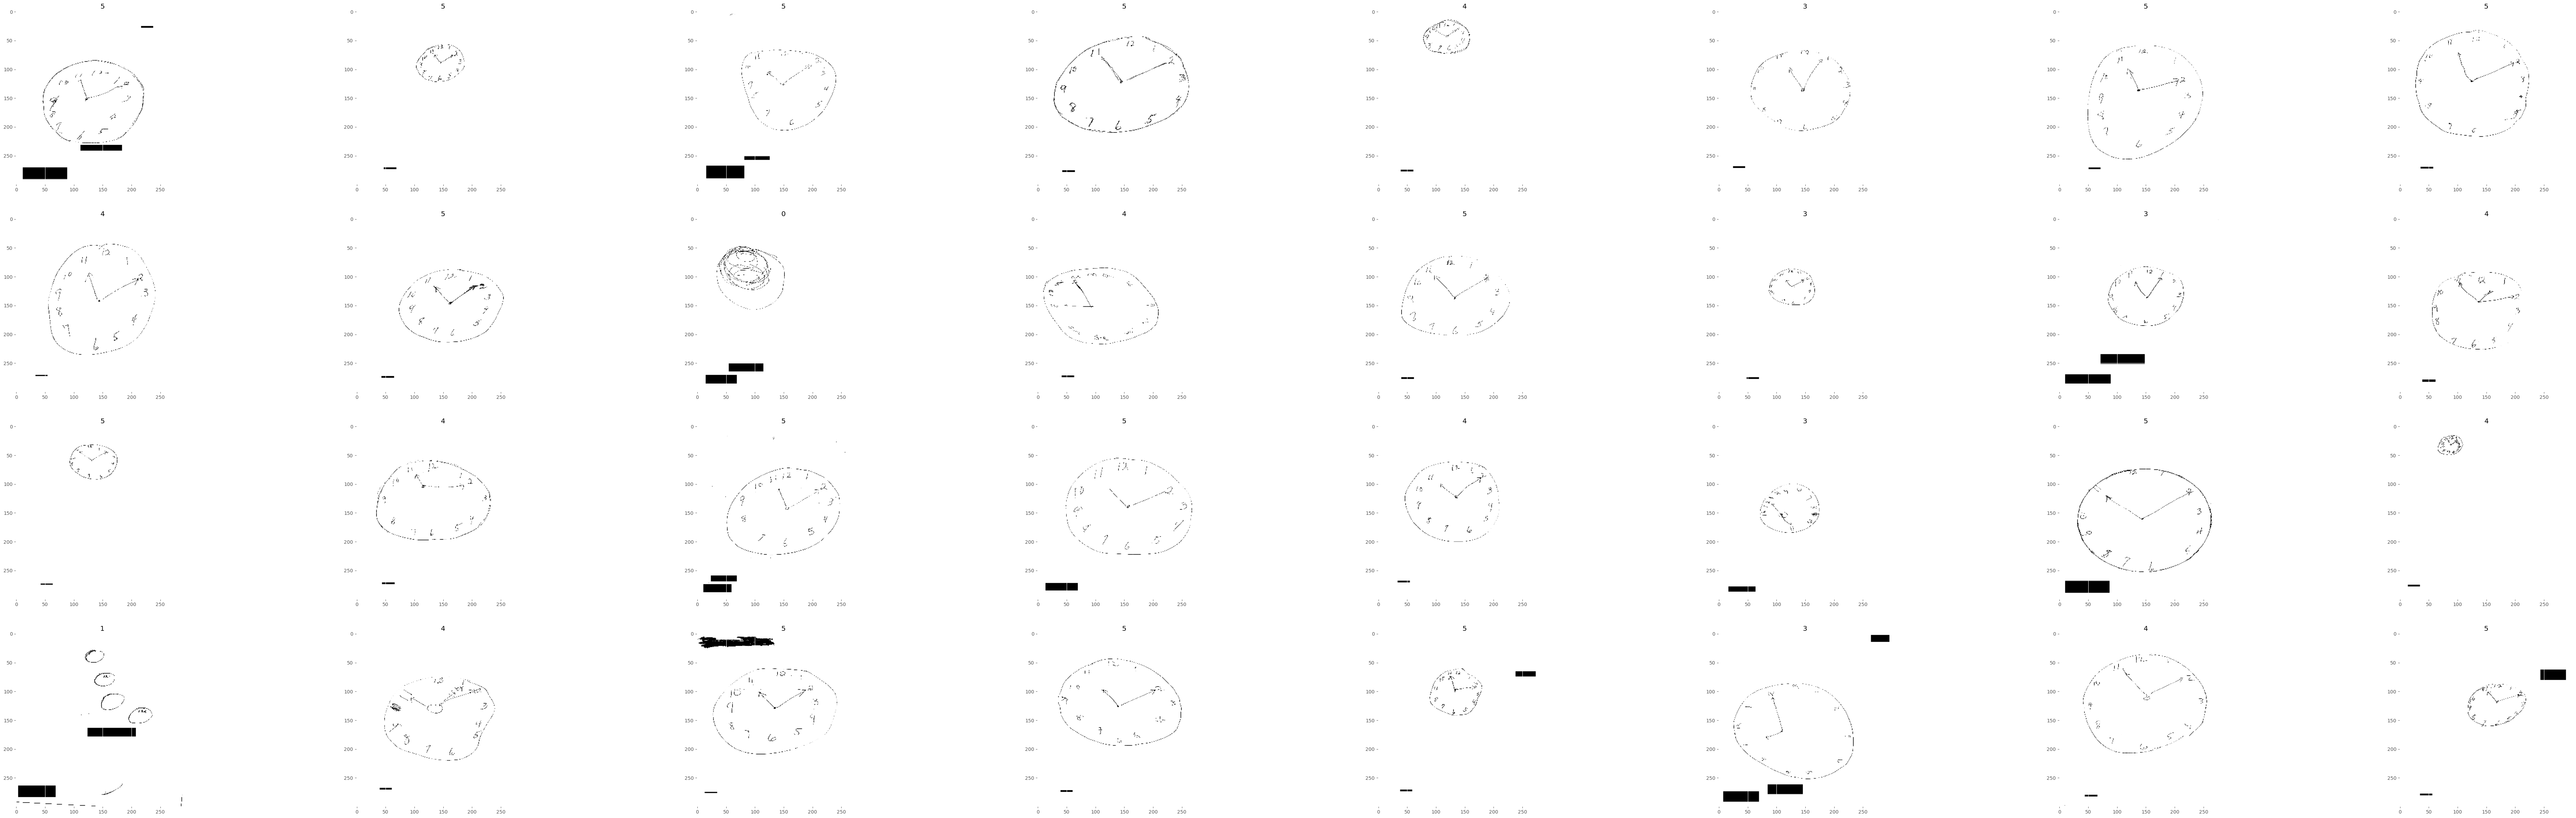

In [38]:
plot_batch(train_loader, batch_size=32)

### Forming Model From here onwards

In [31]:
def softmax(x):
    z = np.exp(x)
    return z/np.sum(z)

def init_params(img_shape, num_classes):
    w = torch.randn((num_classes, img_shape), dtype=torch.float32, requires_grad=True)  # (5, 300*300*3)
    b = torch.randn((num_classes), requires_grad=True) # (5, )
    return [w, b]
    
def forward(x, w, b):
    return softmax(w@x + b) # shape will be (5, 32)

def loss(y, yhat):
    # rememeber that yhat will be of shape (5, 32)
    return torch.sum((torch.nn.functional.one_hot(y_hat-1, num_classes=5).T)*y)

def accuracy()

In [ ]:
img_shape = 300*300*3
num_classes =5

num_epochs = 1
batch_size = 32
params = init_params(img_shape, num_classes)
lr = 0.001
optimizer = SGD(params=params, lr=lr)

In [ ]:
# instead of using the make_batches() function we couold have used the dataloader function from pytorch
def train_using_dataloader(x, y, num_epochs, lr, batch_size, params, optimizer):
    w = params[0]
    b = params[1]
    losses =  []
    data_x = torch.tensor(x, dtype=torch.float32)
    data_y = torch.tensor(y, dtype=torch.float32)
    dataset = torch.concat((data_x, data_y), axis=1)
    for epoch in range(num_epochs):
        losses.append(loss(torch.unsqueeze(dataset[:, 1],1), forward(torch.unsqueeze(dataset[:, 0], 1), w, b)).item()) # this step won't be affective when the dataset is larger, we can instead do the sum of all the bacthes and take their averages    
        if epoch%(num_epochs/10)==0:
            print(f'epoch {epoch + 1}, loss {float(losses[-1]):f}')
        #total_loss  =0
        #batches_processed = 0
        for batch in  torch.utils.data.DataLoader(dataset , batch_size=batch_size):
            # remember batch will be a tensor of (batch_size, 2)
            current_loss = loss(forward(torch.unsqueeze(batch[:, 0], 1), w, b),torch.unsqueeze(batch[:, 1], 1))
            #total_loss+= current_loss.item()
            
            optimizer.zero_grad()
            current_loss.backward()
            optimizer.step()
            #batches_processed+= 1
    return losses

In [ ]:
root_dir = 'C:\\Users\\Ayush\\Desktop\\Let_us_start_once_again\\Classification\\concetto_CDT'
data = pd.read_csv('test.csv')
img_path = os.path.join(root_dir, str(data.iloc[0, 0]))
print(img_path)
style.use('ggplot')
img = cv2.imread(img_path)
plt.imshow(img)
#plt.title(data.iloc[0, 1])
#plt.axis('off')
plt.show()

In [ ]:
root_dir = 'C:\\Users\\Ayush\\Desktop\\Let_us_start_once_again\\Classification\\concetto_CDT'
csv_file = 'train.csv'
batch_size = 64
temp_dataset = make_dataset(csv_file, root_dir, transform=True)
train_loader, test_loader = 

In [ ]:
data = pd.read_csv('test1.csv').values
file = []
for i in range(data.shape[0]):
    file.append((str(int(data[i][0]))+ '.jpg'))
file = pd.DataFrame(file)
file.to_csv('test.csv')

In [ ]:
# first we have to form the dataset and then dataloaders
import os
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels = pd.read_csv(csv_file)  # csv file will be just the path of file
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, str(self.labels.iloc[index, 0]))
        img = torchvision.io.read_image(path=img_path)
        y_label = torch.tensor(int(self.labels.iloc[index, 1]))
        
        if self.transform:
            img = self.transform(img)
        return (img, y_label)